![This is an image](Quant-Trading.jpg)

# **MONTECARLO SIMULATION - POISSON PROCESS**

## **¿How can you build a montercarlo simulation for Poisson Process?**

<font size="3"> Montecarlo simulation is a powerful technique that allows you visualize different paths a financial asset could take in the future. You can also use this technique for derivatives pricing. In this notebook we are showing how you can run a montecarlo simulation for a poisson process in python. Remember that a poisson process is a building block for other stochastic processes that are used in finance to model the behavior of stocks and other financial assets. Poisson Process is useful because it allows us to model jumps. Jumps are very common in stocks, but are clompetely necesarry to model behaviors such as corporate or government defaults on their own debt. <br><br>
    
<font size="3">If you would like to know more about Montercarlo Simulation for other processes such as Geometric Brownian Motion - GBM please look <a href="https://quant-trading.co/montercarlo-simulation-geometric-brownian-motion/" target="_blank">here</a>.<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt

## **Define all the required parameters**

<font size="3"> We need to define some parameters such as: a) The number of simulations that we are going to run, b) The number of steps to use in each path the asset will follow, c) The mean number of jumps <br><br>

In [2]:
M = 1000
d = 250
theta = 0.01

## **Create a function to generate Poisson Distributed Random Variables**

<font size="3"> We can use the rand function to generate uniformly distributed random variables as we have shown <a href="https://quant-trading.co/montercarlo-simulation-geometric-brownian-motion/" target="_blank">here. </a> Then we need to transform the previously generated uniform random variables into poisson random variables. We can do that using the inverse transformed method as following. <br><br>

In [3]:
#################################################################################
#This function is from scipy with the inverse distribution
def Poisson_scipy(M,N,theta):
    N = scipy.stats.distributions.poisson.ppf(rand(M,N),theta)
    return N

Poisson_scipy(M,d,theta)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Create a vector with the initial jump**

<font size="3"> We need to create a column vector that contains the number zero, which is where all the paths start. The number of rows will be equal to the number of simulations that we are going to run<br><br>

In [4]:
JUMPS_vector = Poisson_scipy(M,d,theta)        #100 paths, 365 days, 0.01 jumps per day on average

#To acumulate the jumps
JUMPS_vector_cum = np.zeros((M,d+1))
JUMPS_vector_cum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Generate the simulation paths**

<font size="3"> We can create the paths for our simulation as follows<br><br>

In [5]:
#Calculate the paths
for i in range(0,M):
    for j in range(0,d):
        JUMPS_vector_cum[i,j+1] = JUMPS_vector_cum[i,j]+JUMPS_vector[i,j]

## **Plot the results**

<font size="3"> We can plot the results as follows<br><br>

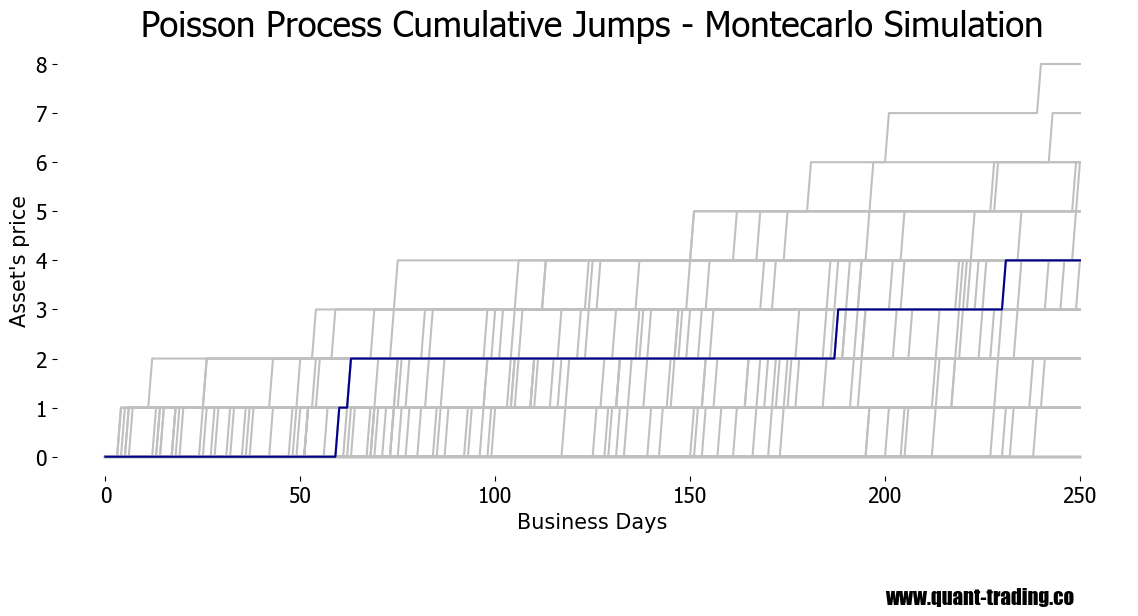

In [6]:
#Plot the paths        

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(JUMPS_vector_cum[0:100,:].transpose(),c='silver')
ax.plot(JUMPS_vector_cum[0:1,:].transpose(),c='darkblue')
ax.set_facecolor('white') 

plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.ylabel("Asset's price",fontsize=15)
plt.xlabel("Business Days",fontsize=15)

plt.title("Poisson Process Cumulative Jumps - Montecarlo Simulation", size=25, family='Tahoma')
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
plt.text(200, np.min(JUMPS_vector_cum[0:100,:])-3,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.show()

<font size="3"> If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)